# Sistema de recomendacion de libros
### Se utlizaron modelos de **nlp** y **sistemas de recomendacion** (se que algo mas usamos pero qsy)

In [1]:
import pandas as pd

In [2]:
df_libros = pd.read_csv("data/books_limpio.csv", index_col = [0])

In [3]:
df_libros.head()

id   book_id  books_count       isbn        isbn13              authors   
0   1   2767052          272  439023483  9.780439e+12      Suzanne Collins  \
2   3     41865          226  316015849  9.780316e+12      Stephenie Meyer   
3   4      2657          487   61120081  9.780061e+12           Harper Lee   
4   5      4671         1356  743273567  9.780743e+12  F. Scott Fitzgerald   
5   6  11870085          226  525478817  9.780525e+12           John Green   

   original_publication_year          original_title                   title   
0                     2008.0        The Hunger Games        The Hunger Games  \
2                     2005.0                Twilight                Twilight   
3                     1960.0   To Kill a Mockingbird   To Kill a Mockingbird   
4                     1925.0        The Great Gatsby        The Great Gatsby   
5                     2012.0  The Fault in Our Stars  The Fault in Our Stars   

  language_code  ...  ratings_4  ratings_5   
0           eng  ...    1481305    2706317  \
2           eng  ...     875073    1355439   
3           eng  ...    1001952    1714267   
4           eng  ...     936012     947718   
5           eng  ...     698471    1311871   

                                         description  pages   
0  Winning will make you famous. Losing means cer...    374  \
2  About three things I was absolutely positive.F...    498   
3  The unforgettable novel of a childhood in a sl...    324   
4  Alternate Cover Edition ISBN: 0743273567 (ISBN...    180   
5  Despite the tumor-shrinking medical miracle th...    313   

                                               genre   
0  Young Adult,Fiction,Science Fiction,Dystopia,F...  \
2  Young Adult,Fantasy,Romance,Paranormal,Vampire...   
3  Classics,Fiction,Historical,Historical Fiction...   
4  Classics,Fiction,Academic,School,Literature,Hi...   
5           Young Adult,Fiction,Romance,Contemporary   

                                      genre_ordenado  genero_1     genero_2   
0  Fiction, Fantasy, Young Adult, Science Fiction...   Fiction      Fantasy  \
2  Fiction, Romance, Fantasy, Fantasy, Young Adul...   Fiction      Romance   
3  Fiction, Historical, Historical Fiction, Class...   Fiction   Historical   
4  Fiction, Romance, Historical, Young Adult, Lit...   Fiction      Romance   
5        Fiction, Romance, Young Adult, Contemporary   Fiction      Romance   

              genero_3          genero_4  
0          Young Adult   Science Fiction  
2              Fantasy           Fantasy  
3   Historical Fiction          Classics  
4           Historical       Young Adult  
5          Young Adult      Contemporary  

[5 rows x 27 columns]

In [4]:
len(df_libros)

7007

# Preprocesar

## detectar idiomas

In [5]:
import pandas as pd
from langdetect import detect

# Define una función para detectar el idioma de un texto
def detect_language(text):
    try:
        language = detect(text)
        return language
    except Exception as e:
        print(f"Error al detectar el idioma: {e}")
        return "No detectado"

# Aplica la detección de idioma a la columna 'descripcion'
df_libros["description"] = df_libros["description"].astype(str)
df_libros['language'] = df_libros['description'].apply(detect_language)

In [6]:
df_libros.language.value_counts()

language
en    6914
es      29
de      15
fr      10
id       7
pl       7
pt       5
hr       4
nl       3
ja       3
ar       2
it       2
sk       1
fa       1
af       1
sv       1
da       1
ru       1
Name: count, dtype: int64

## Traducir a ingles

In [7]:
df_libros['description'].isna().sum()


0

In [8]:
!pip install googletrans==3.1.0a0

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16415 sha256=57946a006aedf0d67fbd35cd0a9e86220c9d652591579032883fc343cd55f88f
  Stored in directory: c:\users\melin\appdata\local\pip\cache\wheels\81\f2\e0\d578821d723b473d18610ea93810e4a5402463919f07e603d9
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0


In [9]:
from googletrans import Translator

In [10]:
def translate_to_english(text):
    if text is None:
        return None
    try:
        translator = Translator()
        return translator.translate(text).text
    except Exception as e:
        print(f"Error en la traducción: {e}")
        return text

df_libros['description_en'] = df_libros['description'].apply(translate_to_english)

In [11]:
df_libros[df_libros["description_en"].str.len() <= 20]
#Son muy pocos caracteres, y las descricpiones no dicen nada

id  book_id  books_count        isbn        isbn13   
1932  2052     1540          331  015602764X  9.780156e+12  \
2184  2323    43326           74   446607207  9.780447e+12   
4375  4729   926908           36   810909650  9.780811e+12   
4760  5154  6952423           39   446569895  9.780447e+12   
6154  6712    87632           32  1585424803  9.781585e+12   
6768  7408   576570           10   823404420  9.780823e+12   

                                                authors   
1932  Sophocles, Dudley Fitts, Elena Bono, Robert Fi...  \
2184                                     Sidney Sheldon   
4375                        Rien Poortvliet, Wil Huygen   
4760                         Ozzy Osbourne, Chris Ayres   
6154                                      Dean Karnazes   
6768             Janet Stevens, Hans Christian Andersen   

      original_publication_year   
1932                     -401.0  \
2184                     1998.0   
4375                     1976.0   
4760                     2009.0   
6154                     2005.0   
6768                     1835.0   

                                         original_title   
1932  The Oedipus Cycle: Oedipus Rex/Oedipus at Colo...  \
2184                                Tell Me Your Dreams   
4375                    Leven en werken van de Kabouter   
4760                                          I Am Ozzy   
6154  Ultramarathon Man: Confessions of an All-Night...   
6768                                Prinsessen på ærten   

                                                  title language_code  ...   
1932  The Oedipus Cycle: Oedipus Rex/Oedipus at Colo...           eng  ...  \
2184                                Tell Me Your Dreams           eng  ...   
4375                                             Gnomes           eng  ...   
4760                                          I Am Ozzy           eng  ...   
6154  Ultramarathon Man: Confessions of an All-Night...           eng  ...   
6768                           The Princess and the Pea           eng  ...   

             description  pages   
1932  (1939 translation)    259  \
2184                 New    384   
4375  Hardcoverno jacket    212   
4760           I Am Ozzy    391   
6154           Rare book    304   
6768            Adaption     48   

                                                  genre   
1932       Classics,Plays,Drama,Fiction,Academic,School  \
2184                  Fiction,Thriller,Mystery,Suspense   
4375                      Fantasy,Art,Fiction,Childrens   
4760  Music,Biography,Nonfiction,Biography,Autobiogr...   
6154  Nonfiction,Sports and Games,Sports,Biography,A...   
6768  Childrens,Classics,Fantasy,Fairy Tales,Short S...   

                                         genre_ordenado    genero_1   
1932  Fiction, Classics, Academic, School, Drama, Plays     Fiction  \
2184               Fiction, Mystery, Thriller, Suspense     Fiction   
4375                   Fiction, Fantasy, Childrens, Art     Fiction   
4760  Nonfiction, Biography, Biography, Autobiograph...  Nonfiction   
6154  Nonfiction, Biography, Autobiography, Memoir, ...  Nonfiction   
6768  Fiction, Fantasy, Childrens, Childrens, Childr...     Fiction   

        genero_2        genero_3        genero_4  language      description_en  
1932    Classics        Academic          School        en  (1939 translation)  
2184     Mystery        Thriller        Suspense        en                 New  
4375     Fantasy       Childrens             Art        sk  Hardcoverno jacket  
4760   Biography       Biography   Autobiography        pl           I Am Ozzy  
6154   Biography   Autobiography          Memoir        af           Rare book  
6768     Fantasy       Childrens       Childrens        en            Adaption  

[6 rows x 29 columns]

In [12]:
df_libros=df_libros[df_libros["description_en"].str.len() >= 20]

In [13]:
df_libros['language_2'] = df_libros['description_en'].apply(detect_language)

In [14]:
df_libros.language_2.value_counts()

language_2
en    6999
nl       1
de       1
Name: count, dtype: int64

In [15]:
df_libros[df_libros.language_2 != 'en']
#Son en ingles las descriciones (aunque en realidad son lso titulos)

id  book_id  books_count        isbn        isbn13   
5784  6300   194086           46   552772291  9.780553e+12  \
6381  6963   434764            9  1570089264  9.781570e+12   

                  authors  original_publication_year   
5784    Madeleine Wickham                     2001.0  \
6381  Stephen E. Robinson                     1992.0   

                                         original_title   
5784                              Sleeping Arrangements  \
6381  Believing Christ: The Parable of the Bicycle a...   

                                                  title language_code  ...   
5784                              Sleeping Arrangements           eng  ...  \
6381  Believing Christ: The Parable of the Bicycle a...           eng  ...   

      pages                                              genre   
5784    240  Autobiography,Memoir,Nonfiction,Biography,Auto...  \
6381    160  Religion,Christianity,Lds,Nonfiction,Religion,...   

                                         genre_ordenado    genero_1   
5784  Nonfiction, Biography, Biography, Autobiograph...  Nonfiction  \
6381  Nonfiction, Religion, Religion, Christianity, ...  Nonfiction   

        genero_2    genero_3        genero_4  language   
5784   Biography   Biography   Autobiography        nl  \
6381    Religion    Religion    Christianity        de   

                     description_en language_2  
5784          Sleeping Arrangements         nl  
6381  Believing Christ Jesus Christ         de  

[2 rows x 30 columns]

In [16]:
ids_a_actualizar = [6300, 6963]

df_libros.loc[df_libros['id'].isin(ids_a_actualizar), 'language_2'] = 'en'


In [17]:
df_libros = df_libros[df_libros['language_2'] == 'en']

In [18]:
df_libros = df_libros.drop(['description', 'language', "language_2"], axis=1)

In [19]:
pd.set_option('display.max_colwidth', 50)
df_libros.head()

id   book_id  books_count       isbn        isbn13              authors   
0   1   2767052          272  439023483  9.780439e+12      Suzanne Collins  \
2   3     41865          226  316015849  9.780316e+12      Stephenie Meyer   
3   4      2657          487   61120081  9.780061e+12           Harper Lee   
4   5      4671         1356  743273567  9.780743e+12  F. Scott Fitzgerald   
5   6  11870085          226  525478817  9.780525e+12           John Green   

   original_publication_year          original_title                   title   
0                     2008.0        The Hunger Games        The Hunger Games  \
2                     2005.0                Twilight                Twilight   
3                     1960.0   To Kill a Mockingbird   To Kill a Mockingbird   
4                     1925.0        The Great Gatsby        The Great Gatsby   
5                     2012.0  The Fault in Our Stars  The Fault in Our Stars   

  language_code  ...  ratings_4  ratings_5  pages   
0           eng  ...    1481305    2706317    374  \
2           eng  ...     875073    1355439    498   
3           eng  ...    1001952    1714267    324   
4           eng  ...     936012     947718    180   
5           eng  ...     698471    1311871    313   

                                               genre   
0  Young Adult,Fiction,Science Fiction,Dystopia,F...  \
2  Young Adult,Fantasy,Romance,Paranormal,Vampire...   
3  Classics,Fiction,Historical,Historical Fiction...   
4  Classics,Fiction,Academic,School,Literature,Hi...   
5           Young Adult,Fiction,Romance,Contemporary   

                                      genre_ordenado  genero_1     genero_2   
0  Fiction, Fantasy, Young Adult, Science Fiction...   Fiction      Fantasy  \
2  Fiction, Romance, Fantasy, Fantasy, Young Adul...   Fiction      Romance   
3  Fiction, Historical, Historical Fiction, Class...   Fiction   Historical   
4  Fiction, Romance, Historical, Young Adult, Lit...   Fiction      Romance   
5        Fiction, Romance, Young Adult, Contemporary   Fiction      Romance   

              genero_3          genero_4   
0          Young Adult   Science Fiction  \
2              Fantasy           Fantasy   
3   Historical Fiction          Classics   
4           Historical       Young Adult   
5          Young Adult      Contemporary   

                                      description_en  
0  Winning will make you famous. Losing means cer...  
2  About three things I was absolutely positive.F...  
3  The unforgettable novel of a childhood in a sl...  
4  Alternate Cover Edition ISBN: 0743273567 (ISBN...  
5  Despite the tumor-shrinking medical miracle th...  

[5 rows x 27 columns]

### Traduzco titulos

In [20]:
df_libros['title_en'] = df_libros['original_title'].apply(translate_to_english)

## Mejoro la descripcion

In [21]:
pd.set_option('display.max_colwidth', None)
df_libros[df_libros.description_en.str.lower().str.contains('isbn')]

id  book_id  books_count       isbn        isbn13   
4        5     4671         1356  743273567  9.780743e+12  \
18      19       34          566  618346252  9.780618e+12   
40      41    28187          159  786838655  9.780787e+12   
48      49    49041          194  316160199  9.780316e+12   
72      73  1656001          161  316068047  9.780316e+12   
...    ...      ...          ...        ...           ...   
8157  9025     5942           58  375724370  9.780376e+12   
8772  9743     3446           38  767904427  9.780768e+12   
8782  9754   376561           81  679725318  9.780680e+12   
8811  9789   818372           52  553277405  9.780553e+12   
8973  9981   106312           58  739455834  9.780739e+12   

                  authors  original_publication_year   
4     F. Scott Fitzgerald                     1925.0  \
18         J.R.R. Tolkien                     1954.0   
40           Rick Riordan                     2005.0   
48        Stephenie Meyer                     2006.0   
72        Stephenie Meyer                     2008.0   
...                   ...                        ...   
8157     Michael Ondaatje                     2000.0   
8772          Tim O'Brien                     1978.0   
8782     Vladimir Nabokov                     1936.0   
8811        Clive Cussler                     1981.0   
8973       Jeffery Deaver                     2005.0   

                   original_title                       title language_code   
4                The Great Gatsby            The Great Gatsby           eng  \
18     The Fellowship of the Ring  The Fellowship of the Ring           eng   
40            The Lightning Thief         The Lightning Thief           eng   
48        New Moon (Twilight, #2)                    New Moon           eng   
72                       The Host                    The Host           eng   
...                           ...                         ...           ...   
8157                 Anil's Ghost                Anil's Ghost           eng   
8772         Going After Cacciato        Going After Cacciato           eng   
8782         Приглашение на казнь   Invitation to a Beheading           eng   
8811                 Night Probe!                Night Probe!           eng   
8973             The Twelfth Card            The Twelfth Card           eng   

      ...  ratings_5  pages   
4     ...     947718    180  \
18    ...    1042394    398   
40    ...     689365    375   
48    ...     350684    563   
72    ...     288758    620   
...   ...        ...    ...   
8157  ...       2109    311   
8772  ...       2705    351   
8782  ...       3218    223   
8811  ...       3075    345   
8973  ...       3643    816   

                                                                                                                                                              genre   
4     Classics,Fiction,Academic,School,Literature,Historical,Historical Fiction,Romance,Novels,Academic,Read For School,Young Adult,High School,Literature,American  \
18                                                                                                                               Fantasy,Classics,Fiction,Adventure   
40                                                                                                                    Fantasy,Young Adult,Fantasy,Mythology,Fiction   
48                                                                                                          Young Adult,Fantasy,Romance,Paranormal,Vampires,Fiction   
72                                                           Science Fiction,Fiction,Young Adult,Science Fiction,Dystopia,Fantasy,Paranormal,Science Fiction,Aliens   
...                                                                                                                                                             ...   
8157                                                                                               Fiction,Cult

In [22]:
patron = r"Alternate Cover Edition for .*? ([^\s]+)"

# Aplicar el reemplazo en la columna "description_en"
df_libros['description_en'] = df_libros['description_en'].str.replace(patron, '', regex=True)

In [23]:
mask1 = df_libros['description_en'].str.startswith('Alternate Cover Edition ISBN')

# Modifica la columna "description" para que comience después de ")"
df_libros.loc[mask1, 'description_en'] = df_libros.loc[mask1, 'description_en'].str.split(')').str[1]

In [29]:

# Verifica si el texto de la columna "description" comienza con "Alternate cover"
mask2 = df_libros['description_en'].str.startswith('Alternate cover for this')

# Modifica la columna "description_en" para que comience después de "here" (considerando la palabra pegada)
df_libros.loc[mask2, 'description_en'] = df_libros.loc[mask2, 'description_en'].str.split('here', n=1).str[1]


In [30]:
import re

def extraer_texto_despues_de_secuencia(texto):
    palabras_clave = ['ASIN', 'ISBN13', 'ISBN 13:', 'ISBN-10']
    secuencia_patron = r"(?i)(?:{})\s+(.+)"

    for palabra_clave in palabras_clave:
        coincidencias = re.findall(secuencia_patron.format(palabra_clave), texto)
        if coincidencias:
            return coincidencias[0].strip()

    return None

# Verifica si el texto de la columna "description_en" comienza con la frase específica
mask = df_libros['description_en'].str.startswith("Librarian's Note: this")

# Aplica la función a la columna 'description_en' solo en las filas que cumplan la máscara
df_libros.loc[mask, 'description_en'] = df_libros.loc[mask, 'description_en'].apply(extraer_texto_despues_de_secuencia)


In [32]:
df_libros.dropna(inplace = True)

In [33]:
df_libros.isna().sum()

id                           0
book_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
pages                        0
genre                        0
genre_ordenado               0
genero_1                     0
genero_2                     0
genero_3                     0
genero_4                     0
description_en               0
title_en                     0
dtype: int64

In [34]:
def eliminar_isbn(texto):
    patron = r"(?i)\bISBN\b|\bISBN13\b|\bISBN10\b|\ASIN\b|\bISBN13:\b|\bISBNs\b|\bACE\b"
    partes = re.split(patron, texto, maxsplit=1)
    texto_sin_isbn = ''.join(partes)
    return texto_sin_isbn.strip()

# Aplicar la función a la columna 'description_en'
df_libros['description_en'] = df_libros['description_en'].apply(eliminar_isbn)

In [35]:
def eliminar_frase(texto):
    patron = r"(?i)There is an alternate cover edition for this"
    texto_sin_frase = re.sub(patron, '', texto)
    return texto_sin_frase.strip()

# Aplicar la función a la columna 'description_en'
df_libros['description_en'] = df_libros['description_en'].apply(eliminar_frase)

In [38]:
def eliminar_frase(texto):
    patron = r"Librarian's Note: This is an alternate cover edition for|Librarian's Note: This is an alternate cover for ASIN|Librarian's Note: This is an alternate cover edition--ASIN|Librarian's Note: This is an alternate-cover edition for"
    texto_sin_frase = re.sub(patron, '', texto, flags=re.IGNORECASE)
    return texto_sin_frase.strip()

# Aplicar la función a la columna 'description_en'
df_libros['description_en'] = df_libros['description_en'].apply(eliminar_frase)


In [39]:
df_libros = df_libros.drop(df_libros[df_libros['id'] == 8797].index)

In [40]:
pd.set_option('display.max_colwidth', 50)
df_libros

id   book_id  books_count        isbn        isbn13   
0        1   2767052          272   439023483  9.780439e+12  \
2        3     41865          226   316015849  9.780316e+12   
3        4      2657          487    61120081  9.780061e+12   
4        5      4671         1356   743273567  9.780743e+12   
5        6  11870085          226   525478817  9.780525e+12   
...    ...       ...          ...         ...           ...   
8985  9995     15613          199  1416523723  9.781417e+12   
8986  9996   7130616           19   441019455  9.780441e+12   
8987  9997    208324           19  067973371X  9.780680e+12   
8988  9998     77431           60  039330762X  9.780393e+12   
8989  9999   8565083            7    61711527  9.780062e+12   

                  authors  original_publication_year   
0         Suzanne Collins                     2008.0  \
2         Stephenie Meyer                     2005.0   
3              Harper Lee                     1960.0   
4     F. Scott Fitzgerald                     1925.0   
5              John Green                     2012.0   
...                   ...                        ...   
8985      Herman Melville                     1924.0   
8986        Ilona Andrews                     2010.0   
8987       Robert A. Caro                     1990.0   
8988      Patrick O'Brian                     1977.0   
8989      Peggy Orenstein                     2011.0   

                                         original_title   
0                                      The Hunger Games  \
2                                              Twilight   
3                                 To Kill a Mockingbird   
4                                      The Great Gatsby   
5                                The Fault in Our Stars   
...                                                 ...   
8985                                 Billy Budd, Sailor   
8986                                         Bayou Moon   
8987                                   Means of Ascent    
8988                              The Mauritius Command   
8989  Cinderella Ate My Daughter: Dispatches from th...   

                                                  title language_code  ...   
0                                      The Hunger Games           eng  ...  \
2                                              Twilight           eng  ...   
3                                 To Kill a Mockingbird           eng  ...   
4                                      The Great Gatsby           eng  ...   
5                                The Fault in Our Stars           eng  ...   
...                                                 ...           ...  ...   
8985                                 Billy Budd, Sailor           eng  ...   
8986                                         Bayou Moon           eng  ...   
8987                                    Means of Ascent           eng  ...   
8988                              The Mauritius Command           eng  ...   
8989  Cinderella Ate My Daughter: Dispatches from th...           eng  ...   

      ratings_5  pages                                              genre   
0       2706317    374  Young Adult,Fiction,Science Fiction,Dystopia,F...  \
2       1355439    498  Young Adult,Fantasy,Romance,Paranormal,Vampire...   
3       1714267    324  Classics,Fiction,Historical,Historical Fiction...   
4        947718    180  Classics,Fiction,Academic,School,Literature,Hi...   
5       1311871    313           Young Adult,Fiction,Romance,Contemporary   
...         ...    ...                                                ...   
8985       1617    160  Classics,Fiction,Literature,Historical,Histori...   
8986       6778    447  Fantasy,Urban Fantasy,Fantasy,Romance,Fantasy,...   
8987       6972    592  Biography,History,Politics,Nonfiction,Politics...   
8988       5180    365  Historical,Historical Fiction,Fiction,Historic...   
8989       2375    245  Nonfiction,Parenting,Feminism,Psychology,Socio...   

       

## Columna: titulo mas descripcion

In [41]:
df_libros['texto']= pd.DataFrame(df_libros.title_en + ' ' + df_libros.description_en)

df_libros.head()

id   book_id  books_count       isbn        isbn13              authors   
0   1   2767052          272  439023483  9.780439e+12      Suzanne Collins  \
2   3     41865          226  316015849  9.780316e+12      Stephenie Meyer   
3   4      2657          487   61120081  9.780061e+12           Harper Lee   
4   5      4671         1356  743273567  9.780743e+12  F. Scott Fitzgerald   
5   6  11870085          226  525478817  9.780525e+12           John Green   

   original_publication_year          original_title                   title   
0                     2008.0        The Hunger Games        The Hunger Games  \
2                     2005.0                Twilight                Twilight   
3                     1960.0   To Kill a Mockingbird   To Kill a Mockingbird   
4                     1925.0        The Great Gatsby        The Great Gatsby   
5                     2012.0  The Fault in Our Stars  The Fault in Our Stars   

  language_code  ...  pages   
0           eng  ...    374  \
2           eng  ...    498   
3           eng  ...    324   
4           eng  ...    180   
5           eng  ...    313   

                                               genre   
0  Young Adult,Fiction,Science Fiction,Dystopia,F...  \
2  Young Adult,Fantasy,Romance,Paranormal,Vampire...   
3  Classics,Fiction,Historical,Historical Fiction...   
4  Classics,Fiction,Academic,School,Literature,Hi...   
5           Young Adult,Fiction,Romance,Contemporary   

                                      genre_ordenado  genero_1     genero_2   
0  Fiction, Fantasy, Young Adult, Science Fiction...   Fiction      Fantasy  \
2  Fiction, Romance, Fantasy, Fantasy, Young Adul...   Fiction      Romance   
3  Fiction, Historical, Historical Fiction, Class...   Fiction   Historical   
4  Fiction, Romance, Historical, Young Adult, Lit...   Fiction      Romance   
5        Fiction, Romance, Young Adult, Contemporary   Fiction      Romance   

              genero_3          genero_4   
0          Young Adult   Science Fiction  \
2              Fantasy           Fantasy   
3   Historical Fiction          Classics   
4           Historical       Young Adult   
5          Young Adult      Contemporary   

                                      description_en                title_en   
0  Winning will make you famous. Losing means cer...        The Hunger Games  \
2  About three things I was absolutely positive.F...                Twilight   
3  The unforgettable novel of a childhood in a sl...   To Kill a Mockingbird   
4  A true classic of twentieth-century literature...        The Great Gatsby   
5  Despite the tumor-shrinking medical miracle th...  The Fault in Our Stars   

                                               texto  
0  The Hunger Games Winning will make you famous....  
2  Twilight About three things I was absolutely p...  
3  To Kill a Mockingbird The unforgettable novel ...  
4  The Great Gatsby A true classic of twentieth-c...  
5  The Fault in Our Stars Despite the tumor-shrin...  

[5 rows x 29 columns]

# NLP: Genero

In [42]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [43]:
#1. Eliminación de Stop Words o Palabras Vacías
def eliminar_stopwords(texto):
  stop_words = set(stopwords.words('english'))
  words = texto.split()
  filtered_words = [word for word in words if word.casefold() not in stop_words]
  filtered_text = ' '.join(filtered_words)
  return filtered_text

In [44]:
df_libros.columns

Index(['id', 'book_id', 'books_count', 'isbn', 'isbn13', 'authors',
       'original_publication_year', 'original_title', 'title', 'language_code',
       'average_rating', 'ratings_count', 'work_ratings_count',
       'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3',
       'ratings_4', 'ratings_5', 'pages', 'genre', 'genre_ordenado',
       'genero_1', 'genero_2', 'genero_3', 'genero_4', 'description_en',
       'title_en', 'texto'],
      dtype='object')

In [45]:
df_libros["texto_limpio"] = df_libros.apply(lambda row: eliminar_stopwords(row["texto"]), axis = 1)
df_libros.head()

id   book_id  books_count       isbn        isbn13              authors   
0   1   2767052          272  439023483  9.780439e+12      Suzanne Collins  \
2   3     41865          226  316015849  9.780316e+12      Stephenie Meyer   
3   4      2657          487   61120081  9.780061e+12           Harper Lee   
4   5      4671         1356  743273567  9.780743e+12  F. Scott Fitzgerald   
5   6  11870085          226  525478817  9.780525e+12           John Green   

   original_publication_year          original_title                   title   
0                     2008.0        The Hunger Games        The Hunger Games  \
2                     2005.0                Twilight                Twilight   
3                     1960.0   To Kill a Mockingbird   To Kill a Mockingbird   
4                     1925.0        The Great Gatsby        The Great Gatsby   
5                     2012.0  The Fault in Our Stars  The Fault in Our Stars   

  language_code  ...                                              genre   
0           eng  ...  Young Adult,Fiction,Science Fiction,Dystopia,F...  \
2           eng  ...  Young Adult,Fantasy,Romance,Paranormal,Vampire...   
3           eng  ...  Classics,Fiction,Historical,Historical Fiction...   
4           eng  ...  Classics,Fiction,Academic,School,Literature,Hi...   
5           eng  ...           Young Adult,Fiction,Romance,Contemporary   

                                      genre_ordenado  genero_1     genero_2   
0  Fiction, Fantasy, Young Adult, Science Fiction...   Fiction      Fantasy  \
2  Fiction, Romance, Fantasy, Fantasy, Young Adul...   Fiction      Romance   
3  Fiction, Historical, Historical Fiction, Class...   Fiction   Historical   
4  Fiction, Romance, Historical, Young Adult, Lit...   Fiction      Romance   
5        Fiction, Romance, Young Adult, Contemporary   Fiction      Romance   

              genero_3          genero_4   
0          Young Adult   Science Fiction  \
2              Fantasy           Fantasy   
3   Historical Fiction          Classics   
4           Historical       Young Adult   
5          Young Adult      Contemporary   

                                      description_en                title_en   
0  Winning will make you famous. Losing means cer...        The Hunger Games  \
2  About three things I was absolutely positive.F...                Twilight   
3  The unforgettable novel of a childhood in a sl...   To Kill a Mockingbird   
4  A true classic of twentieth-century literature...        The Great Gatsby   
5  Despite the tumor-shrinking medical miracle th...  The Fault in Our Stars   

                                               texto   
0  The Hunger Games Winning will make you famous....  \
2  Twilight About three things I was absolutely p...   
3  To Kill a Mockingbird The unforgettable novel ...   
4  The Great Gatsby A true classic of twentieth-c...   
5  The Fault in Our Stars Despite the tumor-shrin...   

                                        texto_limpio  
0  Hunger Games Winning make famous. Losing means...  
2  Twilight three things absolutely positive.Firs...  
3  Kill Mockingbird unforgettable novel childhood...  
4  Great Gatsby true classic twentieth-century li...  
5  Fault Stars Despite tumor-shrinking medical mi...  

[5 rows x 30 columns]

In [46]:
import string
import re

#Normalización del Texto.

def normalizar_texto(texto):
  #Eliminar Mayúsculas:
  paso1 = texto.lower()
  #Eliminar Puntuación:
  translator = str.maketrans('', '', string.punctuation)
  paso2 = paso1.translate(translator)
  #Eliminar Números:
  paso3 = re.sub(r'\d+', '', paso2)
  return paso3

In [47]:
df_libros["texto_limpio"] = df_libros.apply(lambda row: normalizar_texto(row["texto_limpio"]), axis = 1)
df_libros.head()

id   book_id  books_count       isbn        isbn13              authors   
0   1   2767052          272  439023483  9.780439e+12      Suzanne Collins  \
2   3     41865          226  316015849  9.780316e+12      Stephenie Meyer   
3   4      2657          487   61120081  9.780061e+12           Harper Lee   
4   5      4671         1356  743273567  9.780743e+12  F. Scott Fitzgerald   
5   6  11870085          226  525478817  9.780525e+12           John Green   

   original_publication_year          original_title                   title   
0                     2008.0        The Hunger Games        The Hunger Games  \
2                     2005.0                Twilight                Twilight   
3                     1960.0   To Kill a Mockingbird   To Kill a Mockingbird   
4                     1925.0        The Great Gatsby        The Great Gatsby   
5                     2012.0  The Fault in Our Stars  The Fault in Our Stars   

  language_code  ...                                              genre   
0           eng  ...  Young Adult,Fiction,Science Fiction,Dystopia,F...  \
2           eng  ...  Young Adult,Fantasy,Romance,Paranormal,Vampire...   
3           eng  ...  Classics,Fiction,Historical,Historical Fiction...   
4           eng  ...  Classics,Fiction,Academic,School,Literature,Hi...   
5           eng  ...           Young Adult,Fiction,Romance,Contemporary   

                                      genre_ordenado  genero_1     genero_2   
0  Fiction, Fantasy, Young Adult, Science Fiction...   Fiction      Fantasy  \
2  Fiction, Romance, Fantasy, Fantasy, Young Adul...   Fiction      Romance   
3  Fiction, Historical, Historical Fiction, Class...   Fiction   Historical   
4  Fiction, Romance, Historical, Young Adult, Lit...   Fiction      Romance   
5        Fiction, Romance, Young Adult, Contemporary   Fiction      Romance   

              genero_3          genero_4   
0          Young Adult   Science Fiction  \
2              Fantasy           Fantasy   
3   Historical Fiction          Classics   
4           Historical       Young Adult   
5          Young Adult      Contemporary   

                                      description_en                title_en   
0  Winning will make you famous. Losing means cer...        The Hunger Games  \
2  About three things I was absolutely positive.F...                Twilight   
3  The unforgettable novel of a childhood in a sl...   To Kill a Mockingbird   
4  A true classic of twentieth-century literature...        The Great Gatsby   
5  Despite the tumor-shrinking medical miracle th...  The Fault in Our Stars   

                                               texto   
0  The Hunger Games Winning will make you famous....  \
2  Twilight About three things I was absolutely p...   
3  To Kill a Mockingbird The unforgettable novel ...   
4  The Great Gatsby A true classic of twentieth-c...   
5  The Fault in Our Stars Despite the tumor-shrin...   

                                        texto_limpio  
0  hunger games winning make famous losing means ...  
2  twilight three things absolutely positivefirst...  
3  kill mockingbird unforgettable novel childhood...  
4  great gatsby true classic twentiethcentury lit...  
5  fault stars despite tumorshrinking medical mir...  

[5 rows x 30 columns]

### lematizacion

In [48]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('punkt')

# Crear un objeto lematizador
lemmatizer = WordNetLemmatizer()

# Definir una función para lematizar un texto
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenizar el texto en palabras
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lematizar cada palabra
    return ' '.join(lemmatized_tokens)  # Unir las palabras lematizadas en un solo texto

# Aplicar la lematización a la columna "texto_limpio"
df_libros['texto_lemmatizado'] = df_libros['texto_limpio'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\melin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\melin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [49]:
df_libros.head()

id   book_id  books_count       isbn        isbn13              authors   
0   1   2767052          272  439023483  9.780439e+12      Suzanne Collins  \
2   3     41865          226  316015849  9.780316e+12      Stephenie Meyer   
3   4      2657          487   61120081  9.780061e+12           Harper Lee   
4   5      4671         1356  743273567  9.780743e+12  F. Scott Fitzgerald   
5   6  11870085          226  525478817  9.780525e+12           John Green   

   original_publication_year          original_title                   title   
0                     2008.0        The Hunger Games        The Hunger Games  \
2                     2005.0                Twilight                Twilight   
3                     1960.0   To Kill a Mockingbird   To Kill a Mockingbird   
4                     1925.0        The Great Gatsby        The Great Gatsby   
5                     2012.0  The Fault in Our Stars  The Fault in Our Stars   

  language_code  ...                                     genre_ordenado   
0           eng  ...  Fiction, Fantasy, Young Adult, Science Fiction...  \
2           eng  ...  Fiction, Romance, Fantasy, Fantasy, Young Adul...   
3           eng  ...  Fiction, Historical, Historical Fiction, Class...   
4           eng  ...  Fiction, Romance, Historical, Young Adult, Lit...   
5           eng  ...        Fiction, Romance, Young Adult, Contemporary   

   genero_1     genero_2             genero_3          genero_4   
0   Fiction      Fantasy          Young Adult   Science Fiction  \
2   Fiction      Romance              Fantasy           Fantasy   
3   Fiction   Historical   Historical Fiction          Classics   
4   Fiction      Romance           Historical       Young Adult   
5   Fiction      Romance          Young Adult      Contemporary   

                                      description_en                title_en   
0  Winning will make you famous. Losing means cer...        The Hunger Games  \
2  About three things I was absolutely positive.F...                Twilight   
3  The unforgettable novel of a childhood in a sl...   To Kill a Mockingbird   
4  A true classic of twentieth-century literature...        The Great Gatsby   
5  Despite the tumor-shrinking medical miracle th...  The Fault in Our Stars   

                                               texto   
0  The Hunger Games Winning will make you famous....  \
2  Twilight About three things I was absolutely p...   
3  To Kill a Mockingbird The unforgettable novel ...   
4  The Great Gatsby A true classic of twentieth-c...   
5  The Fault in Our Stars Despite the tumor-shrin...   

                                        texto_limpio   
0  hunger games winning make famous losing means ...  \
2  twilight three things absolutely positivefirst...   
3  kill mockingbird unforgettable novel childhood...   
4  great gatsby true classic twentiethcentury lit...   
5  fault stars despite tumorshrinking medical mir...   

                                   texto_lemmatizado  
0  hunger game winning make famous losing mean ce...  
2  twilight three thing absolutely positivefirst ...  
3  kill mockingbird unforgettable novel childhood...  
4  great gatsby true classic twentiethcentury lit...  
5  fault star despite tumorshrinking medical mira...  

[5 rows x 31 columns]

### Descargo el dataset preparado

In [56]:
duplicados = df_libros.duplicated(subset=['title'], keep=False)

# Agrupar por título y mostrar todos los registros duplicados
df_libros[duplicados].groupby(['title', 'id']).apply(lambda x: x)


id   book_id  books_count        isbn   
title         id                                                   
Abandon       5262 4855  5262   9397967           33   545284104  \
              9335 8422  9335   6049585           22   312537409   
After         3701 3439  3701  22557520           72  1476792488   
              6674 6122  6674   6338619           20   670011835   
All Fall Down 2583 2425  2583  18144115           19  145161778X   
...                       ...       ...          ...         ...   
Vanish        3035 2835  3035     32255           78   345476980   
              5579 5139  5579   9436632           39    61935107   
Wanted        2929 2737  2929   3047851           23    61566179   
              5998 5521  5998  16152943           10  098870742X   
              8157 7405  8157    160848           22  1582404976   

                               isbn13   
title         id                        
Abandon       5262 4855  9.780545e+12  \
              9335 8422  9.780313e+12   
After         3701 3439  9.781477e+12   
              6674 6122  9.780670e+12   
All Fall Down 2583 2425  9.781452e+12   
...                               ...   
Vanish        3035 2835  9.780345e+12   
              5579 5139  9.780062e+12   
Wanted        2929 2737  9.780062e+12   
              5998 5521  9.780989e+12   
              8157 7405  9.781582e+12   

                                                           authors   
title         id                                                     
Abandon       5262 4855                                  Meg Cabot  \
              9335 8422                               Blake Crouch   
After         3701 3439                                  Anna Todd   
              6674 6122                                   Amy Efaw   
All Fall Down 2583 2425                            Jennifer Weiner   
...                                                            ...   
Vanish        3035 2835                             Tess Gerritsen   
              5579 5139                              Sophie Jordan   
Wanted        2929 2737                               Sara Shepard   
              5998 5521                              Kelly Elliott   
              8157 7405  Mark Millar, J.G. Jones, Brian K. Vaughan   

                         original_publication_year original_title   
title         id                                                    
Abandon       5262 4855                     2011.0        Abandon  \
              9335 8422                     2009.0        Abandon   
After         3701 3439                     2014.0          After   
              6674 6122                     2009.0          After   
All Fall Down 2583 2425                     2014.0  All Fall Down   
...                                            ...            ...   
Vanish        3035 2835                     2006.0         Vanish   
              5579 5139                     2011.0         Vanish   
Wanted        2929 2737                     2010.0         Wanted   
              5998 5521                     2012.0         Wanted   
              8157 7405                     2005.0         Wanted   

                                 title language_code  ...   
title         id                                      ...   
Abandon       5262 4855        Abandon           eng  ...  \
              9335 8422        Abandon           eng  ...   
After         3701 3439          After           eng  ...   
              6674 6122          After           eng  ...   
All Fall Down 2583 2425  All Fall Down           eng  ...   
...                                ...           ...  ...   
Vanish        3035 2835         Vanish           eng  ...   
              5579 5139         Vanish           eng  ...   
Wanted        2929 2737         Wanted           eng  ...   
              5998 5521         Wanted           eng  ...   
              8157 7405         Wanted           eng  ...   

     

In [59]:
df_libros = df_libros.drop_duplicates(subset='title_en', keep='first')

In [61]:
df_libros.to_csv("data/books_limpio_def.csv", index=False)

## Modelo

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [131]:
vectorizer = TfidfVectorizer(min_df=15, max_df = 0.8, analyzer='word', token_pattern=r'\w+',
                             use_idf=True, smooth_idf=True, sublinear_tf=True,
                             stop_words='english', ngram_range=(1, 2))
vectors = vectorizer.fit_transform(df_libros['texto_lemmatizado'])
vectors.shape

(6885, 5361)

In [132]:
corpus_tfidf_array = vectors.toarray()

In [133]:
# Convertir la matriz TF-IDF en un DataFrame
tfidf_df = pd.DataFrame(corpus_tfidf_array, columns=vectorizer.vocabulary_.keys())



In [134]:
# Calcular la suma de los valores TF-IDF para cada columna
column_sum = tfidf_df.sum()

# Ordenar las columnas por su suma de valores TF-IDF en orden descendente
columnas_importantes = column_sum.sort_values(ascending=False).index

# Especificar el número de columnas más importantes que deseas mantener
num_columnas = 5000  # Actualiza este valor según tus necesidades

# Seleccionar las primeras n columnas más importantes del DataFrame tfidf_df
tfidf_importantes = tfidf_df[columnas_importantes[:num_columnas]]

# Mostrar el DataFrame resultante con las columnas más importantes
tfidf_importantes.head()


classmate  deceased   silence  sensuous  disappearing     brand       bus   
0   0.040791  0.052847  0.000000       0.0      0.000000  0.000000  0.000000  \
1   0.000000  0.000000  0.000000       0.0      0.077580  0.000000  0.137451   
2   0.000000  0.000000  0.000000       0.0      0.095241  0.000000  0.099661   
3   0.000000  0.125522  0.077397       0.0      0.050799  0.084087  0.053156   
4   0.000000  0.000000  0.000000       0.0      0.068586  0.000000  0.071769   

      troop     vital    gained  ...  envy  upside  divided  captivated   
0  0.000000  0.000000  0.000000  ...   0.0     0.0      0.0         0.0  \
1  0.000000  0.088341  0.000000  ...   0.0     0.0      0.0         0.0   
2  0.000000  0.064054  0.064238  ...   0.0     0.0      0.0         0.0   
3  0.000000  0.097940  0.058012  ...   0.0     0.0      0.0         0.0   
4  0.072261  0.000000  0.000000  ...   0.0     0.0      0.0         0.0   

   intimate  jerry  helen  proposal  professor  bell  
0       0.0    0.0    0.0       0.0        0.0   0.0  
1       0.0    0.0    0.0       0.0        0.0   0.0  
2       0.0    0.0    0.0       0.0        0.0   0.0  
3       0.0    0.0    0.0       0.0        0.0   0.0  
4       0.0    0.0    0.0       0.0        0.0   0.0  

[5 rows x 5000 columns]

In [135]:
# Concatenar el DataFrame tfidf_df con df_libros
df_combined = pd.concat([df_libros.reset_index(drop=True), tfidf_importantes], axis=1)
df_combined.head()

id   book_id  books_count       isbn        isbn13              authors   
0   1   2767052          272  439023483  9.780439e+12      Suzanne Collins  \
1   3     41865          226  316015849  9.780316e+12      Stephenie Meyer   
2   4      2657          487   61120081  9.780061e+12           Harper Lee   
3   5      4671         1356  743273567  9.780743e+12  F. Scott Fitzgerald   
4   6  11870085          226  525478817  9.780525e+12           John Green   

   original_publication_year          original_title                   title   
0                     2008.0        The Hunger Games        The Hunger Games  \
1                     2005.0                Twilight                Twilight   
2                     1960.0   To Kill a Mockingbird   To Kill a Mockingbird   
3                     1925.0        The Great Gatsby        The Great Gatsby   
4                     2012.0  The Fault in Our Stars  The Fault in Our Stars   

  language_code  ...  envy  upside  divided  captivated  intimate  jerry   
0           eng  ...   0.0     0.0      0.0         0.0       0.0    0.0  \
1           eng  ...   0.0     0.0      0.0         0.0       0.0    0.0   
2           eng  ...   0.0     0.0      0.0         0.0       0.0    0.0   
3           eng  ...   0.0     0.0      0.0         0.0       0.0    0.0   
4           eng  ...   0.0     0.0      0.0         0.0       0.0    0.0   

   helen  proposal  professor  bell  
0    0.0       0.0        0.0   0.0  
1    0.0       0.0        0.0   0.0  
2    0.0       0.0        0.0   0.0  
3    0.0       0.0        0.0   0.0  
4    0.0       0.0        0.0   0.0  

[5 rows x 5032 columns]

## Chequeo tipo de datos y encoding

In [136]:
df_combined.columns

Index(['id', 'book_id', 'books_count', 'isbn', 'isbn13', 'authors',
       'original_publication_year', 'original_title', 'title', 'language_code',
       ...
       'envy', 'upside', 'divided', 'captivated', 'intimate', 'jerry', 'helen',
       'proposal', 'professor', 'bell'],
      dtype='object', length=5032)

In [137]:
df_libros.columns

Index(['id', 'book_id', 'books_count', 'isbn', 'isbn13', 'authors',
       'original_publication_year', 'original_title', 'title', 'language_code',
       'average_rating', 'ratings_count', 'work_ratings_count',
       'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3',
       'ratings_4', 'ratings_5', 'pages', 'genre', 'genre_ordenado',
       'genero_1', 'genero_2', 'genero_3', 'genero_4', 'description_en',
       'title_en', 'texto', 'texto_limpio', 'texto_lemmatizado', 'Cluster'],
      dtype='object')

In [138]:
print(df_libros.authors.unique().tolist())

['Suzanne Collins', 'Stephenie Meyer', 'Harper Lee', 'F. Scott Fitzgerald', 'John Green', 'J.D. Salinger', 'Khaled Hosseini', 'Veronica Roth', 'George Orwell, Erich Fromm, Celâl Üster', 'George Orwell', 'Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-Doubleday', 'Stieg Larsson, Reg Keeland', 'J.R.R. Tolkien', 'Alice Sebold', 'William Golding', 'William Shakespeare, Robert           Jackson', 'Gillian Flynn', 'Kathryn Stockett', 'John Steinbeck', 'Arthur Golden', 'E.L. James', 'Paulo Coelho, Alan R. Clarke', 'Lois Lowry', 'Audrey Niffenegger', 'George R.R. Martin', 'Elizabeth Gilbert', 'Rick Riordan', 'Louisa May Alcott', 'Charlotte Brontë, Michael Mason', 'Nicholas Sparks', 'Yann Martel', 'Sara Gruen', 'Markus Zusak', 'Ray Bradbury', 'Shel Silverstein', 'Cassandra Clare', 'Christopher Paolini', 'Douglas Adams', 'Aldous Huxley', 'Sue Monk Kidd', 'Mark Twain, John Seelye, Guy Cardwell', 'Mark Haddon', 'Paula Hawkins', 'Emily Brontë, Richard J. Dunn', 'Jodi Picoult', 'Kurt Vonnegut Jr.', 'M

In [139]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_combined['authors'] = label_encoder.fit_transform(df_combined['authors'])
df_combined.authors.dtypes

dtype('int32')

In [140]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_combined['language_code'] = label_encoder.fit_transform(df_combined['language_code'])
df_combined.language_code.dtypes

dtype('int32')

In [141]:
columnas = ['genero_1', 'genero_2', 'genero_3', 'genero_4']
for col in columnas:
  df_combined[col] = label_encoder.fit_transform(df_combined[col])
  print(df_combined[col].dtypes)

int32
int32
int32
int32


In [142]:
df_stand = df_combined

In [143]:
print(df_stand.columns.tolist())

['id', 'book_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'pages', 'genre', 'genre_ordenado', 'genero_1', 'genero_2', 'genero_3', 'genero_4', 'description_en', 'title_en', 'texto', 'texto_limpio', 'texto_lemmatizado', 'Cluster', 'classmate', 'deceased', 'silence', 'sensuous', 'disappearing', 'brand', 'bus', 'troop', 'vital', 'gained', 'man love', 'security', 'specific', 'survey', 'standalone', 'vol', 'intricate', 'finally', 'suffer', 'work art', 'happen', 'x', 'model', 'greece', 'today s', 'moving story', 'feisty', 'previously', 'monster', 'adventure', 'good evil', 'partner', 'composed', 'love life', 'psychologist', 'delivered', 'companion', 'soil', 'removed', 'quit', 'body', 'total', 'know s', 'roarke', 'thirteenyearold', 'inspiring', 'carrie', 'poor', 'sidekick'

In [144]:
columnas_excluidas = ['id','book_id', 'isbn', 'isbn13','original_title', 'title', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'genre', 'genre_ordenado','description_en', 'title_en', 'texto', 'texto_limpio', 'texto_lemmatizado']
df_stand = df_stand.drop(columnas_excluidas, axis=1)


In [145]:
from sklearn.preprocessing import StandardScaler

# Obtener las columnas numéricas
columnas_numericas = df_stand.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Estandarizar las variables numéricas
scaler = StandardScaler()
df_stand[columnas_numericas] = scaler.fit_transform(df_stand[columnas_numericas])


# K means

In [146]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

C:\Users\melin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\melin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\melin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\melin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

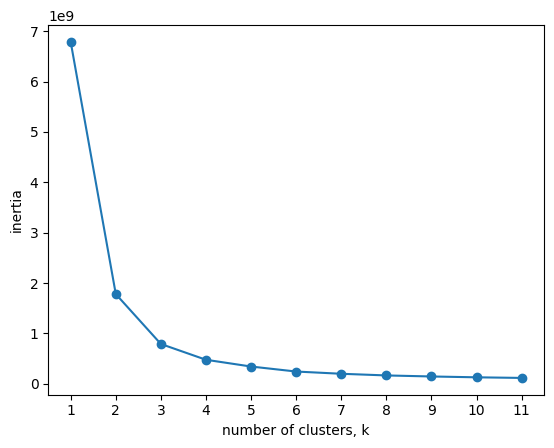

In [147]:
ks = range(1, 12) #probamos 6 cluster distntios
inertias = [] #es el costo, distancia al centroide
for k in ks:
# Genera un modelo para KMeans con k clústeres
    model = KMeans(k)
# Ajusta el modelo a las muestras
    model.fit(df_stand)
# Agrega las inercias calculadas
    inertias.append(model.inertia_)
# Gráfico de inercias vs. número de clusters
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [148]:
# Create a KMeans instance with k clusters: model
model = KMeans(4) #corremos con 3 por el elbow

# Fit model to samples
labels = model.fit_predict(df_stand)

C:\Users\melin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [149]:
df_libros['Cluster']= labels

In [150]:
df_libros.head()

id   book_id  books_count       isbn        isbn13              authors   
0   1   2767052          272  439023483  9.780439e+12      Suzanne Collins  \
2   3     41865          226  316015849  9.780316e+12      Stephenie Meyer   
3   4      2657          487   61120081  9.780061e+12           Harper Lee   
4   5      4671         1356  743273567  9.780743e+12  F. Scott Fitzgerald   
5   6  11870085          226  525478817  9.780525e+12           John Green   

   original_publication_year          original_title                   title   
0                     2008.0        The Hunger Games        The Hunger Games  \
2                     2005.0                Twilight                Twilight   
3                     1960.0   To Kill a Mockingbird   To Kill a Mockingbird   
4                     1925.0        The Great Gatsby        The Great Gatsby   
5                     2012.0  The Fault in Our Stars  The Fault in Our Stars   

  language_code  ...  genero_1     genero_2             genero_3   
0           eng  ...   Fiction      Fantasy          Young Adult  \
2           eng  ...   Fiction      Romance              Fantasy   
3           eng  ...   Fiction   Historical   Historical Fiction   
4           eng  ...   Fiction      Romance           Historical   
5           eng  ...   Fiction      Romance          Young Adult   

           genero_4                                     description_en   
0   Science Fiction  Winning will make you famous. Losing means cer...  \
2           Fantasy  About three things I was absolutely positive.F...   
3          Classics  The unforgettable novel of a childhood in a sl...   
4       Young Adult  A true classic of twentieth-century literature...   
5      Contemporary  Despite the tumor-shrinking medical miracle th...   

                 title_en                                              texto   
0        The Hunger Games  The Hunger Games Winning will make you famous....  \
2                Twilight  Twilight About three things I was absolutely p...   
3   To Kill a Mockingbird  To Kill a Mockingbird The unforgettable novel ...   
4        The Great Gatsby  The Great Gatsby A true classic of twentieth-c...   
5  The Fault in Our Stars  The Fault in Our Stars Despite the tumor-shrin...   

                                        texto_limpio   
0  hunger games winning make famous losing means ...  \
2  twilight three things absolutely positivefirst...   
3  kill mockingbird unforgettable novel childhood...   
4  great gatsby true classic twentiethcentury lit...   
5  fault stars despite tumorshrinking medical mir...   

                                   texto_lemmatizado  Cluster  
0  hunger game winning make famous losing mean ce...        3  
2  twilight three thing absolutely positivefirst ...        3  
3  kill mockingbird unforgettable novel childhood...        2  
4  great gatsby true classic twentiethcentury lit...        2  
5  fault star despite tumorshrinking medical mira...        2  

[5 rows x 32 columns]

In [160]:
df_libros.to_csv("data/books_limpio_def.csv", index=False)

In [151]:
df_libros.Cluster.value_counts()

Cluster
0    1832
1    1814
3    1651
2    1588
Name: count, dtype: int64

In [152]:
df_stand['cluster'] = labels

C:\Users\melin\AppData\Local\Temp\ipykernel_2232\3456395557.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_stand['cluster'] = labels


In [153]:
# Calcular las características promedio de cada clúster
caracteristicas_promedio = df_stand.groupby('cluster').mean()

# Mostrar las características promedio de cada clúster
caracteristicas_promedio

books_count      authors  original_publication_year  language_code   
cluster                                                                       
0          -0.015062   477.125000                  -0.048546       2.108079  \
1          -0.045044  2212.379272                   0.072176       2.074421   
2           0.082817  1395.578715                  -0.005593       2.084383   
3          -0.013452  3042.522714                  -0.020054       2.072683   

         average_rating  ratings_count  work_ratings_count   
cluster                                                      
0             -0.019512      -0.036126           -0.037073  \
1             -0.004634      -0.031235           -0.033651   
2             -0.010053       0.028935            0.032026   
3              0.036413       0.046575            0.047307   

         work_text_reviews_count     pages  genero_1  ...      envy    upside   
cluster                                               ...                       
0                      -0.043596  0.019581  7.948690  ...  0.000465  0.062888  \
1                      -0.009780 -0.059119  8.286108  ...  0.039364 -0.015363   
2                       0.029273 -0.046922  7.996851  ...  0.000603 -0.038223   
3                       0.030965  0.088359  7.943065  ... -0.044346 -0.016139   

          divided  captivated  intimate     jerry     helen  proposal   
cluster                                                                 
0       -0.003572   -0.004555 -0.036355 -0.024573 -0.011534  0.007111  \
1        0.011172   -0.013000  0.045842 -0.021700  0.020393  0.033379   
2        0.007313    0.000706 -0.013788  0.028507 -0.007571 -0.035937   
3       -0.015345    0.018658  0.003235  0.023690 -0.002326 -0.010000   

         professor      bell  
cluster                       
0        -0.001941 -0.035733  
1        -0.013023  0.022612  
2         0.004722  0.002196  
3         0.011920  0.012695  

[4 rows x 5011 columns]

## Plabras comunes por genero

In [155]:
df_libros.genero_1.value_counts()

genero_1
Fiction                4512
Nonfiction             1103
Romance                 868
Fantasy                 250
Young Adult              47
Childrens                37
Sequential Art           23
Mystery                  14
Historical               11
Religion                  3
Cultural                  3
History                   2
Literature                2
Science Fiction           2
Classics                  2
Thriller                  2
Self Help                 1
Humor                     1
Erotica                   1
European Literature       1
Name: count, dtype: int64

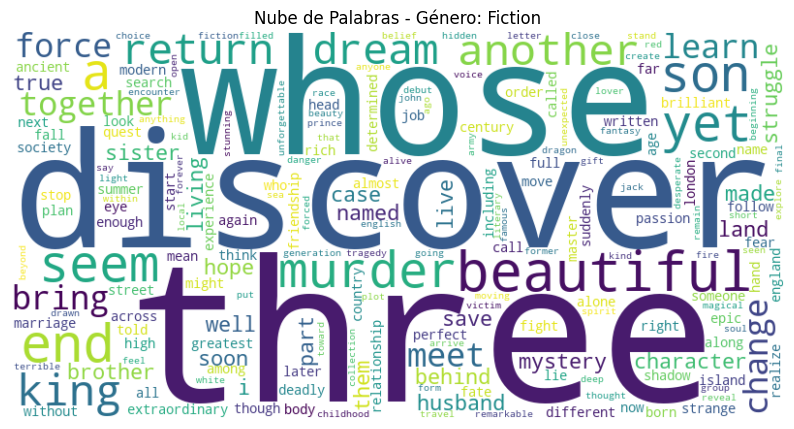

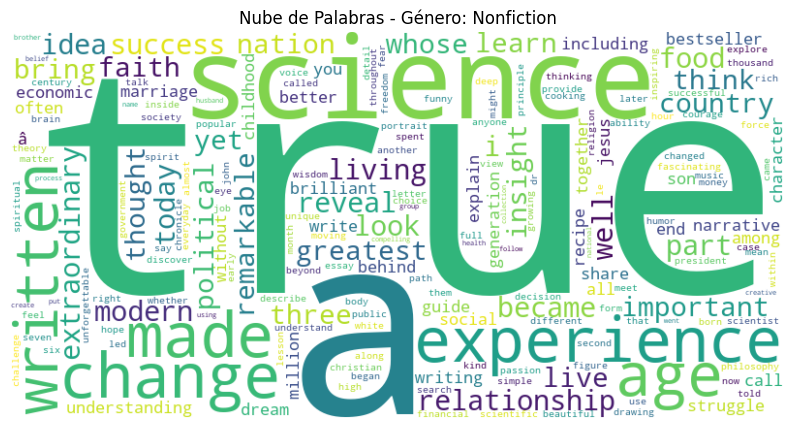

In [165]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Obtener los géneros únicos en tu dataset
generos_unicos = df_libros['genero_1'].unique()

# Calcular la frecuencia de cada palabra en todos los géneros
frecuencias_globales = nltk.FreqDist([token for doc in df_libros['texto_lemmatizado'] for token in doc.split()])

# Crear un conjunto de palabras comunes a excluir
palabras_comunes = set()

# Recorrer los géneros para identificar palabras comunes
for genero in generos_unicos:
    # Filtrar el subconjunto de libros por género
    subconjunto = df_libros[df_libros['genero_1'] == genero]
    # Obtener los tokens del corpus del género
    tokens_genero = [token for doc in subconjunto['texto_lemmatizado'] for token in doc.split()]
    # Calcular la frecuencia de las palabras del género
    frecuencias_genero = nltk.FreqDist(tokens_genero)
    # Obtener las palabras más frecuentes del género
    palabras_frecuentes_genero = [palabra for palabra, frecuencia in frecuencias_genero.most_common(50)]
    # Verificar si las palabras frecuentes del género tienen una frecuencia alta global
    palabras_frecuentes_excluir = [palabra for palabra in palabras_frecuentes_genero if frecuencias_globales[palabra] >= 0.9 * len(generos_unicos)]
    # Agregar las palabras a excluir al conjunto de palabras comunes
    palabras_comunes.update(palabras_frecuentes_excluir)

for genero in ['Fiction', 'Nonfiction']:
    # Filtrar el subconjunto de libros por género
    subconjunto = df_libros[df_libros['genero_1'] == genero]
    # Obtener todos los textos lematizados del género
    textos_lemmatizados = ' '.join(subconjunto['texto_lemmatizado'])
    # Crear la nube de palabras
    wordcloud = WordCloud(stopwords=palabras_comunes, background_color='white', colormap='viridis',
                          width=800, height=400).generate(textos_lemmatizados)
    # Visualizar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras - Género: ' + genero)
    plt.show()


In [173]:
df_libros.genero_2.value_counts()

genero_2
 Fantasy                0.237182
 Romance                0.173711
 Historical             0.106754
 Mystery                0.094553
 Young Adult            0.044444
 History                0.043282
 Cultural               0.037908
 Childrens              0.035294
 Literature             0.032970
 Science Fiction        0.029484
 Biography              0.027015
 Religion               0.021786
 Sequential Art         0.018155
 Contemporary           0.017284
 Science                0.014234
 Classics               0.013508
 Self Help              0.009296
 Thriller               0.007843
 Humor                  0.005519
 Philosophy             0.004357
 Reference              0.003050
 European Literature    0.002760
 Autobiography          0.002324
 Nonfiction             0.002033
 Food and Drink         0.002033
 Art                    0.001452
 Business               0.001307
 Christian              0.001017
 Audiobook              0.001017
 Psychology             0.001017
 

In [178]:
generos_2 = df_libros['genero_2'].value_counts().head(10).index.tolist()
generos_2


[' Fantasy',
 ' Romance',
 ' Historical',
 ' Mystery',
 ' Young Adult',
 ' History',
 ' Cultural',
 ' Childrens',
 ' Literature',
 ' Science Fiction']

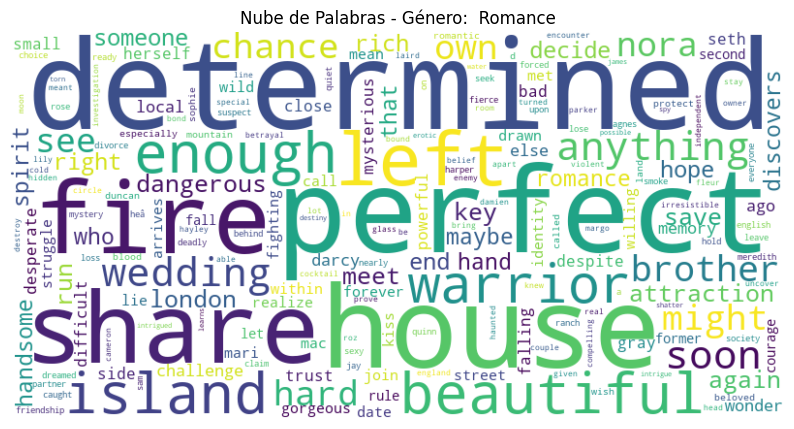

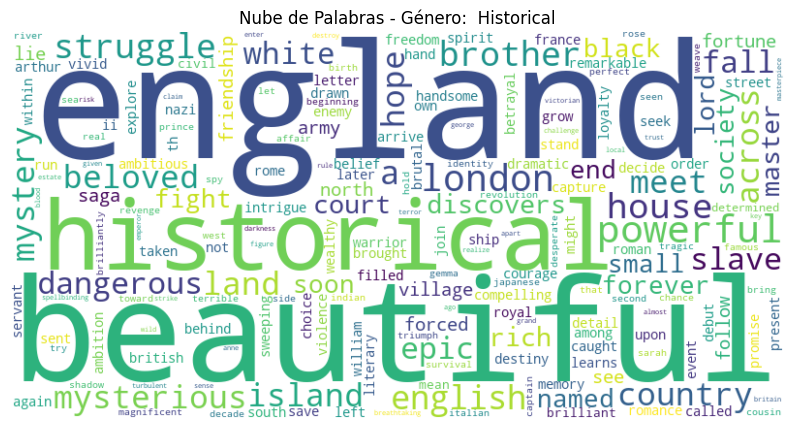

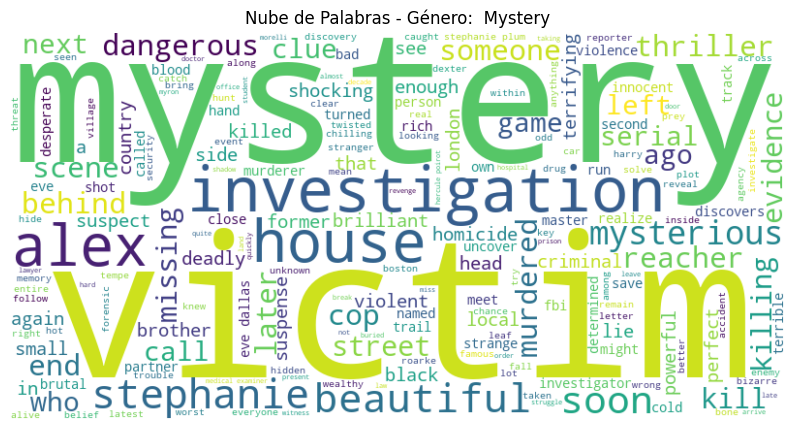

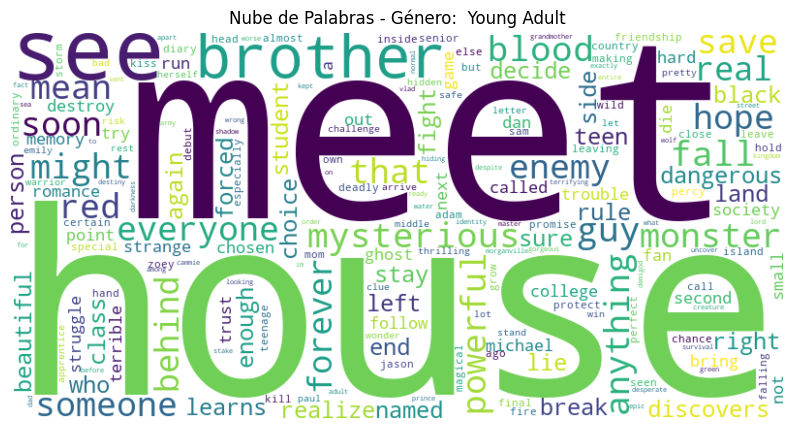

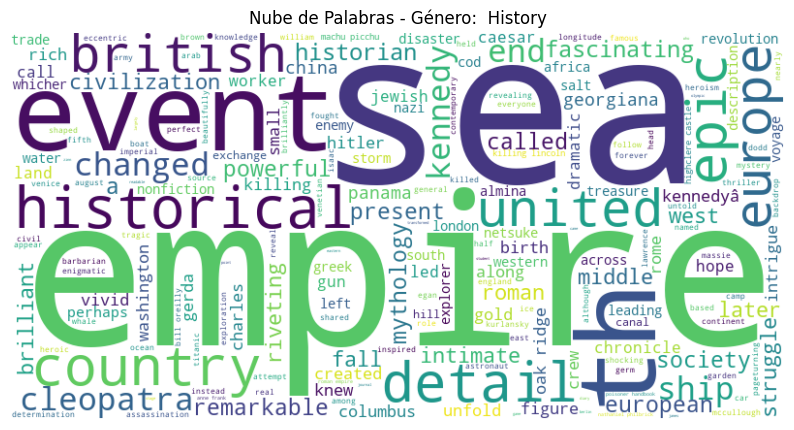

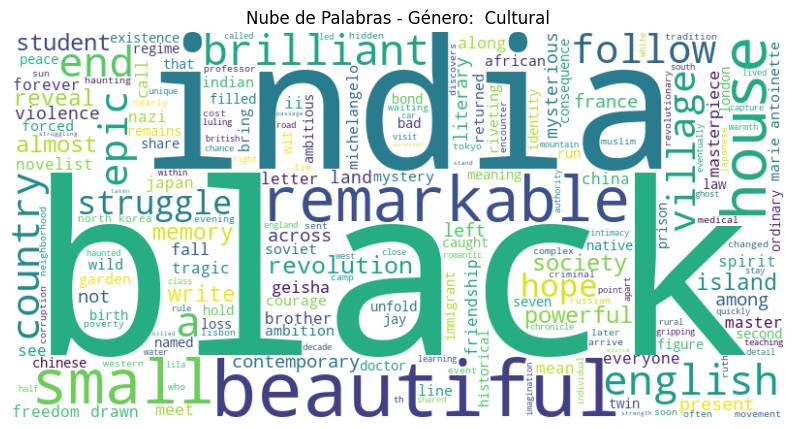

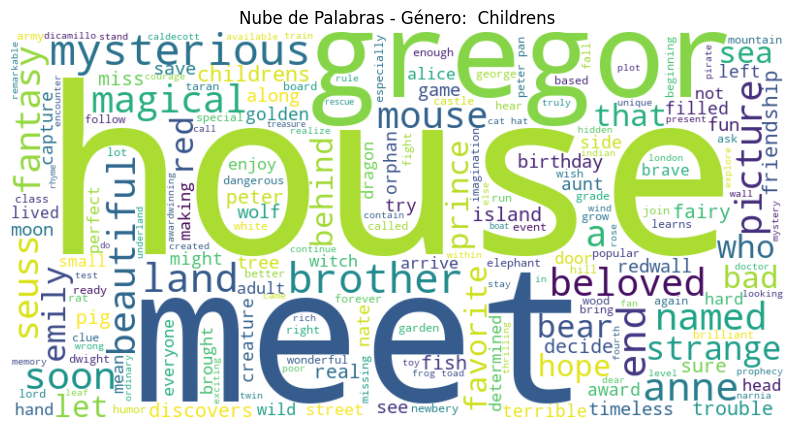

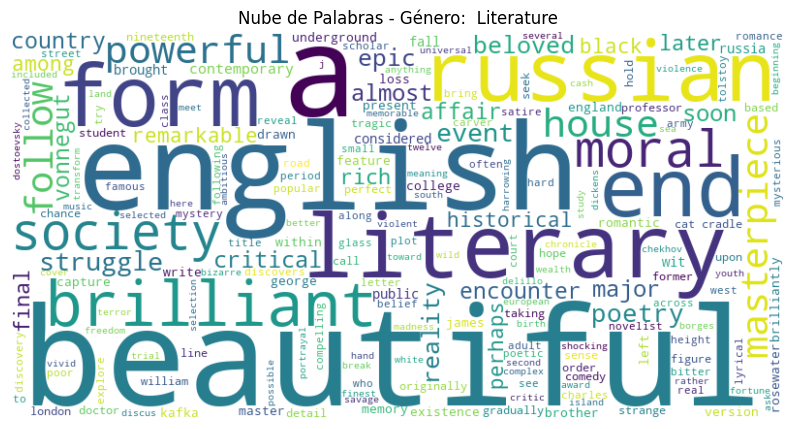

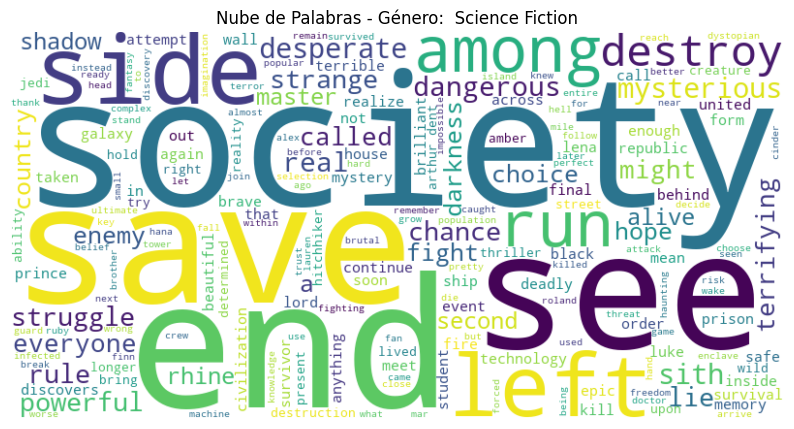

In [179]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Obtener los géneros únicos en tu dataset
generos_unicos = df_libros['genero_2'].unique()

# Calcular la frecuencia de cada palabra en todos los géneros
frecuencias_globales = nltk.FreqDist([token for doc in df_libros['texto_lemmatizado'] for token in doc.split()])

# Crear un conjunto de palabras comunes a excluir
palabras_comunes = set()

# Recorrer los géneros para identificar palabras comunes
for genero in generos_unicos:
    # Filtrar el subconjunto de libros por género
    subconjunto = df_libros[df_libros['genero_2'] == genero]
    # Obtener los tokens del corpus del género
    tokens_genero = [token for doc in subconjunto['texto_lemmatizado'] for token in doc.split()]
    # Calcular la frecuencia de las palabras del género
    frecuencias_genero = nltk.FreqDist(tokens_genero)
    # Obtener las palabras más frecuentes del género
    palabras_frecuentes_genero = [palabra for palabra, frecuencia in frecuencias_genero.most_common(50)]
    # Verificar si las palabras frecuentes del género tienen una frecuencia alta global
    palabras_frecuentes_excluir = [palabra for palabra in palabras_frecuentes_genero if frecuencias_globales[palabra] >= 0.9 * len(generos_unicos)]
    # Agregar las palabras a excluir al conjunto de palabras comunes
    palabras_comunes.update(palabras_frecuentes_excluir)

# Generar la nube de palabras por género
for genero in generos_2:
    # Filtrar el subconjunto de libros por género
    subconjunto = df_libros[df_libros['genero_3'] == genero]
    # Obtener todos los textos lematizados del género
    textos_lemmatizados = ' '.join(subconjunto['texto_lemmatizado'])
    # Crear la nube de palabras excluyendo las palabras comunes
    wordcloud = WordCloud(stopwords=palabras_comunes, background_color='white', colormap='viridis',
                          width=800, height=400).generate(textos_lemmatizados)
    # Visualizar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras - Género: ' + genero)
    plt.show()


In [169]:
df_libros.genero_3.unique().tolist()

[' Young Adult',
 ' Fantasy',
 ' Historical Fiction',
 ' Historical',
 ' Literature',
 ' Contemporary',
 ' Science Fiction',
 ' Classics',
 ' Mystery',
 ' Erotica',
 ' Memoir',
 ' Womens Fiction',
 ' Childrens',
 ' Autobiography',
 ' Adventure',
 ' Politics',
 ' Romance',
 ' Paranormal',
 ' Cultural',
 ' Contemporary Romance',
 ' Adult',
 ' Academic',
 ' Psychology',
 ' Adult Fiction',
 ' Biography',
 ' Thriller',
 ' Spirituality',
 ' Sequential Art',
 ' Business',
 ' Science',
 ' Self Help',
 ' Animals',
 ' Humor',
 ' Audiobook',
 ' Horror',
 ' Religion',
 ' Art',
 ' Literary Fiction',
 ' History',
 ' Novels',
 ' Space',
 ' Drama',
 ' Philosophy',
 ' Food and Drink',
 ' European Literature',
 ' Picture Books',
 ' Short Stories',
 ' Reference',
 ' Leadership',
 ' Sports',
 ' Asian Literature',
 ' Environment',
 ' Christian',
 ' War',
 ' Writing',
 ' Chick Lit',
 ' Health',
 ' Plays',
 ' Suspense',
 ' Comics',
 ' Crime',
 ' Sports and Games',
 ' Spy Thriller',
 ' Holiday',
 ' Dungeons a

In [184]:
# Obtener los géneros únicos de genero_1 y genero_2
generos_1 = df_libros['genero_2'].unique()
generos_2 = df_libros['genero_3'].unique()

# Filtrar los géneros de genero_2 que no están en genero_1
generos_excluidos = [genero for genero in generos_2 if genero not in generos_1]

# Obtener el conteo de cada género en genero_2
conteo_generos = df_libros['genero_3'].value_counts()

# Obtener los top 10 géneros de genero_2 que no están en genero_1
top_generos = conteo_generos[generos_excluidos].nlargest(10)

# Convertir los top géneros a una lista
top_generos_lista = top_generos.index.tolist()

print(top_generos_lista)

[' Space', ' Comics', ' Academic', ' Memoir', ' Dungeons and Dragons', ' Adult', ' Asian Literature', ' Writing', ' Science Fiction Fantasy', ' Chick Lit']


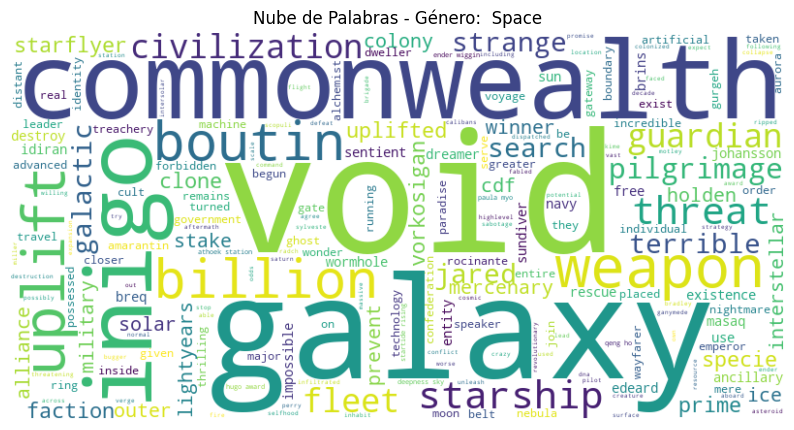

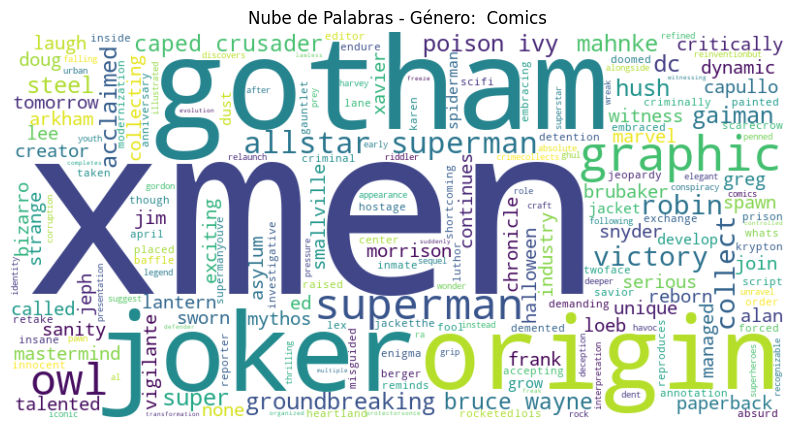

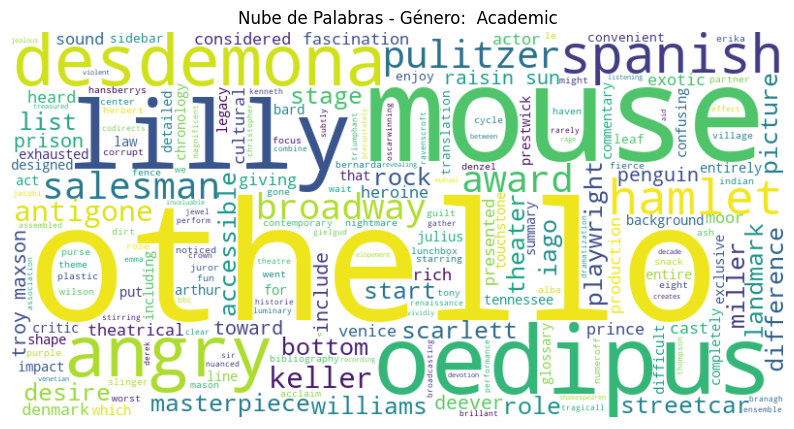

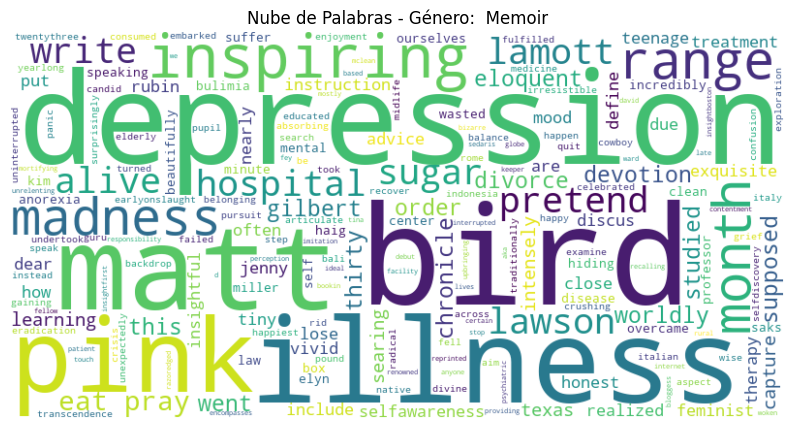

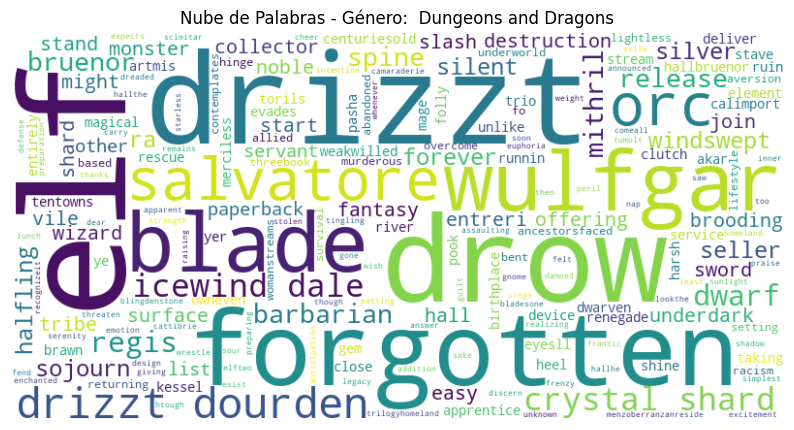

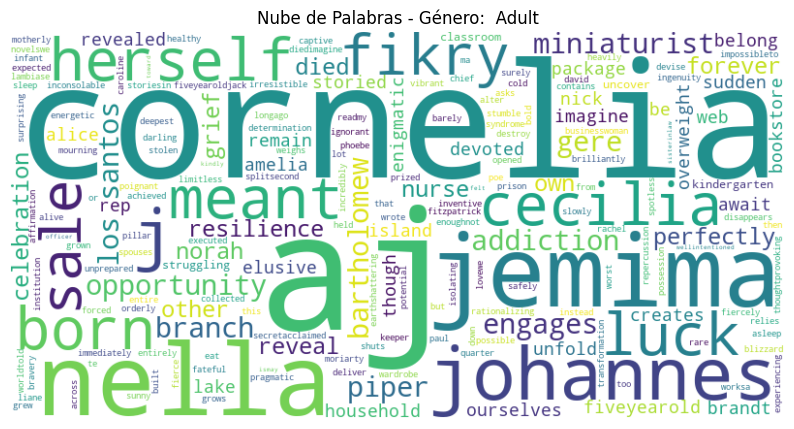

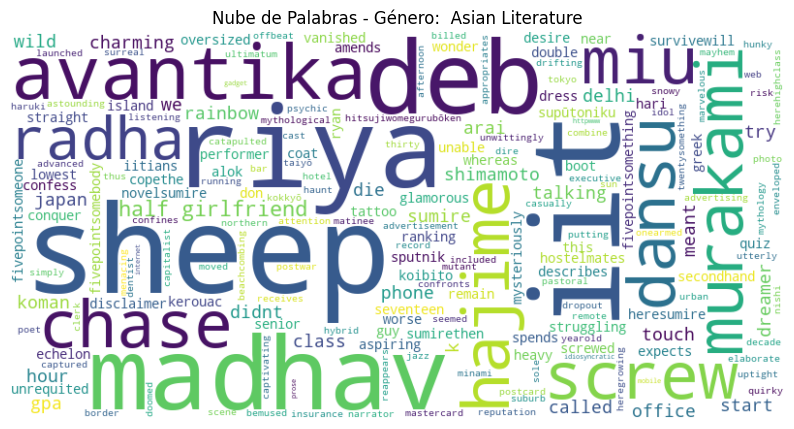

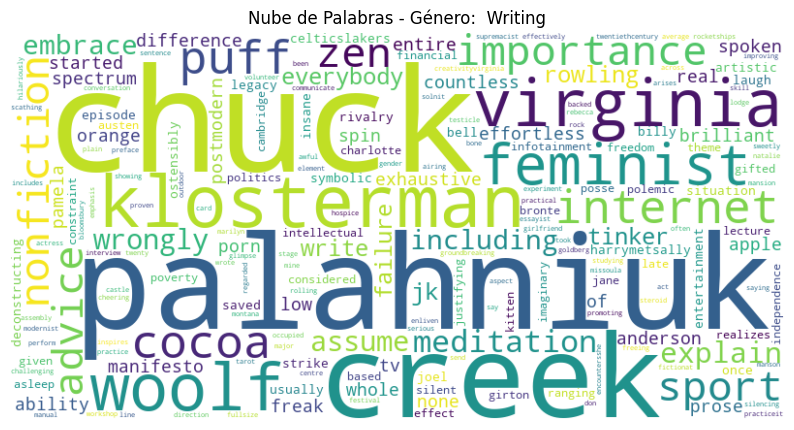

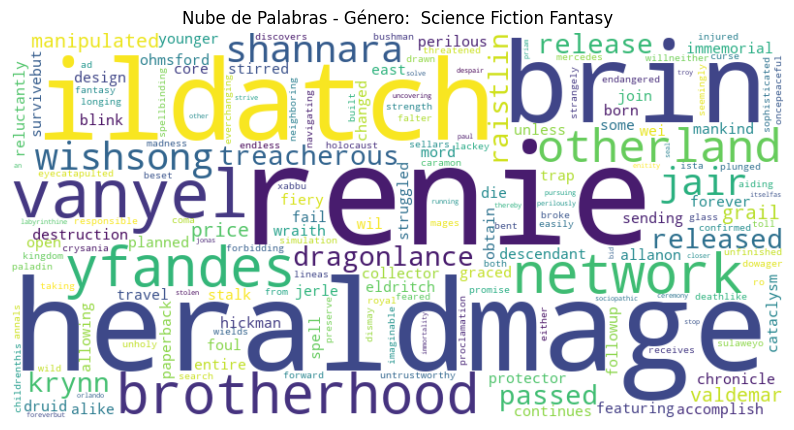

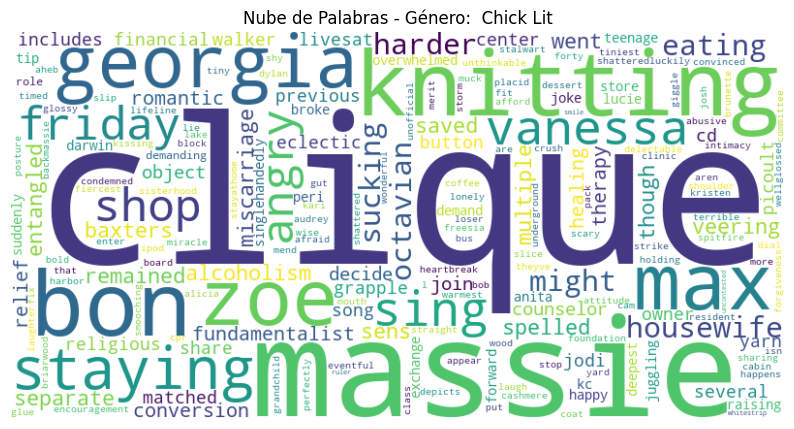

In [185]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Obtener los géneros únicos en tu dataset
generos_unicos = df_libros['genero_3'].unique()

# Calcular la frecuencia de cada palabra en todos los géneros
frecuencias_globales = nltk.FreqDist([token for doc in df_libros['texto_lemmatizado'] for token in doc.split()])

# Crear un conjunto de palabras comunes a excluir
palabras_comunes = set()

# Recorrer los géneros para identificar palabras comunes
for genero in generos_unicos:
    # Filtrar el subconjunto de libros por género
    subconjunto = df_libros[df_libros['genero_3'] == genero]
    # Obtener los tokens del corpus del género
    tokens_genero = [token for doc in subconjunto['texto_lemmatizado'] for token in doc.split()]
    # Calcular la frecuencia de las palabras del género
    frecuencias_genero = nltk.FreqDist(tokens_genero)
    # Obtener las palabras más frecuentes del género
    palabras_frecuentes_genero = [palabra for palabra, frecuencia in frecuencias_genero.most_common(50)]
    # Verificar si las palabras frecuentes del género tienen una frecuencia alta global
    palabras_frecuentes_excluir = [palabra for palabra in palabras_frecuentes_genero if frecuencias_globales[palabra] >= 0.9 * len(generos_unicos)]
    # Agregar las palabras a excluir al conjunto de palabras comunes
    palabras_comunes.update(palabras_frecuentes_excluir)

# Generar la nube de palabras por género
for genero in top_generos_lista:
    # Filtrar el subconjunto de libros por género
    subconjunto = df_libros[df_libros['genero_3'] == genero]
    # Obtener todos los textos lematizados del género
    textos_lemmatizados = ' '.join(subconjunto['texto_lemmatizado'])
    # Crear la nube de palabras excluyendo las palabras comunes
    wordcloud = WordCloud(stopwords=palabras_comunes, background_color='white', colormap='viridis',
                          width=800, height=400).generate(textos_lemmatizados)
    # Visualizar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras - Género: ' + genero)
    plt.show()
